In [1]:
import pandas as pd

In [110]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
import sklearn
import graphviz
from matplotlib import pyplot as plt

Trying a model with the cleaned data, using FIRE_SIZE_CLASS as the label.

In [94]:
data = pd.read_pickle('final_dataset_1.pkl')


In [95]:
data.head()


,DISCOVERY_DATETIME,STATE,TIME_TO_CONT,FIRE_YEAR,STAT_CAUSE_CODE,LATITUDE,LONGITUDE,FIRE_SIZE_CLASS
0,2,4.0,4.50,2005,9.0,40.036944,-121.005833,1
1,5,4.0,6.75,2004,1.0,38.933056,-120.404444,1
2,5,4.0,1.05,2004,5.0,38.984167,-120.735556,1
3,6,4.0,118.00,2004,1.0,38.559167,-119.913333,1
4,6,4.0,116.00,2004,1.0,38.559167,-119.933056,1


In [96]:
y = data['FIRE_SIZE_CLASS']
X = data.drop(columns=['FIRE_SIZE_CLASS'])

In [97]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: FIRE_SIZE_CLASS, dtype: int64

In [98]:
X.head()

,DISCOVERY_DATETIME,STATE,TIME_TO_CONT,FIRE_YEAR,STAT_CAUSE_CODE,LATITUDE,LONGITUDE
0,2,4.0,4.50,2005,9.0,40.036944,-121.005833
1,5,4.0,6.75,2004,1.0,38.933056,-120.404444
2,5,4.0,1.05,2004,5.0,38.984167,-120.735556
3,6,4.0,118.00,2004,1.0,38.559167,-119.913333
4,6,4.0,116.00,2004,1.0,38.559167,-119.933056


In [99]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=20)

In [100]:
clf = DecisionTreeClassifier(random_state=0)
clf = clf.fit(X_train, y_train)
y_train_predict = clf.predict(X_train)
y_test_predict = clf.predict(X_test)
print(accuracy_score(y_train, y_train_predict))
print(accuracy_score(y_test, y_test_predict))

0.998142707029603
0.5902474156059015


In [101]:
md = [1, 2, 4,8, 16, 32, 64]
rand_state = [1, 2, 3, 4, 5]

In [102]:
clf = DecisionTreeClassifier(random_state=0)

In [103]:
import numpy as np

train_accuracy = []
test_accuracy = []

for i in md:
    ta = []
    tsa = []
    for j in rand_state:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=j)
        clf = DecisionTreeClassifier(random_state=0, max_depth=i)
        clf = clf.fit(X_train, y_train)
        y_train_predict = clf.predict(X_train)
        y_test_predict = clf.predict(X_test)
        ta.append((accuracy_score(y_train, y_train_predict)))
        tsa.append((accuracy_score(y_test, y_test_predict)))
    train_accuracy.append(ta)
    test_accuracy.append(tsa)

In [104]:
train_mean = np.mean(train_accuracy,1)
train_std = np.std(train_accuracy, 1)

In [105]:
test_mean = np.mean(test_accuracy, 1)
test_std = np.std(test_accuracy, 1)

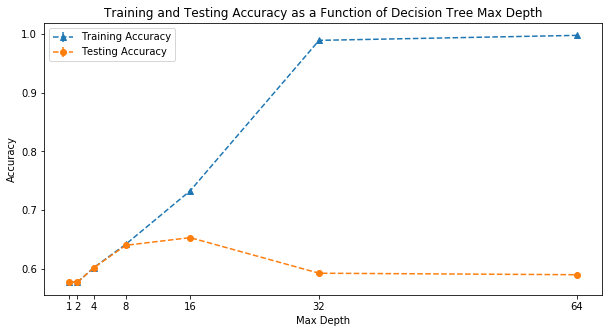

In [107]:
plt.figure(figsize=(10,5))

plt.errorbar(md, train_mean, yerr=train_std, linestyle='dashed', marker='^', label='Training Accuracy')
plt.errorbar(md, test_mean, yerr=test_std, linestyle='dashed', marker='o', label='Testing Accuracy')
plt.title('Training and Testing Accuracy as a Function of Decision Tree Max Depth')
plt.ylabel('Accuracy')
plt.xlabel('Max Depth')
plt.xticks(md, md)
plt.legend()

## Try again, with data that has outliers removed

In [111]:
data = pd.read_pickle('final_data_without_outliers.pkl')

In [112]:
y = data['FIRE_SIZE_CLASS']
X = data.drop(columns=['FIRE_SIZE_CLASS'])

In [ ]:
X.head()

In [113]:
md = [1, 2, 4,8, 16, 32, 64]
rand_state = [1, 2, 3, 4, 5]

In [118]:
import numpy as np

train_accuracy = []
test_accuracy = []

for i in md:
    ta = []
    tsa = []
    for j in rand_state:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=j)
        clf = DecisionTreeClassifier(random_state=j, max_depth=i)
        clf = clf.fit(X_train, y_train)
        y_train_predict = clf.predict(X_train)
        y_test_predict = clf.predict(X_test)
        ta.append((accuracy_score(y_train, y_train_predict)))
        tsa.append((accuracy_score(y_test, y_test_predict)))
    train_accuracy.append(ta)
    test_accuracy.append(tsa)

In [119]:
train_mean = np.mean(train_accuracy,1)
train_std = np.std(train_accuracy, 1)
test_mean = np.mean(test_accuracy, 1)
test_std = np.std(test_accuracy, 1)

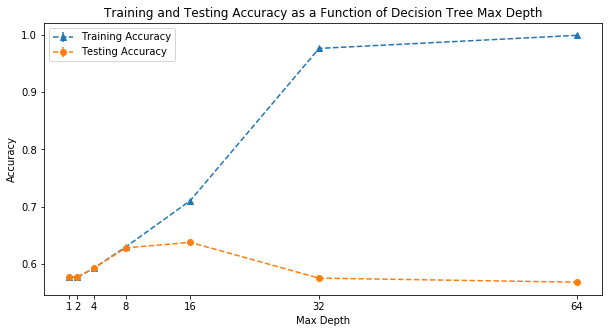

In [120]:
plt.figure(figsize=(10,5))

plt.errorbar(md, train_mean, yerr=train_std, linestyle='dashed', marker='^', label='Training Accuracy')
plt.errorbar(md, test_mean, yerr=test_std, linestyle='dashed', marker='o', label='Testing Accuracy')
plt.title('Training and Testing Accuracy as a Function of Decision Tree Max Depth')
plt.ylabel('Accuracy')
plt.xlabel('Max Depth')
plt.xticks(md, md)
plt.legend()

## Conclusion, removing outliers has little impact on this specific measure